In [1]:
from IPython.display import clear_output

import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

# Применение нейронных сетей в предсказании временных рядов
---
- [A Gentle Introduction to Handling a Non-Stationary Time Series in Python](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/)
- [A comprehensive beginner’s guide to create a Time Series Forecast](https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/)
- [Detecting stationarity in time series data](https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638)
- [Most useful Python functions for Time Series Analysis](https://towardsdatascience.com/most-useful-python-functions-for-time-series-analysis-ed1a9cb3aa8b)
- [Data transformations and forecasting models: what to use and whenData transformations and forecasting models: what to use and when](https://people.duke.edu/~rnau/whatuse.htmhttps://people.duke.edu/~rnau/whatuse.htm)

Что общего у прогнозирования потребления электроэнергии домохозяйствами, оценки трафика на дорогах в определенные периоды, прогнозировании паводков и прогнозировании цены, по которой акции будут торговаться на фондовой бирже?

Все они подпадают под понятие данных временных рядов! Вы не можете точно предсказать любой из этих результатов без компонента «время». И по мере того, как в мире вокруг нас генерируется все больше и больше данных, прогнозирование временных рядов становится все более важной областью применения методов ML и DL.

Но временные ряды - это сложная тема, в которой одновременно задействовано несколько аспектов.

Основное внимание в этой статье уделяется методам проверки стационарности данных временных рядов и ее использовании в прогнозировании.

## 1. Когда достаточно Mashine Learning

### Оглавление:
---
1.1 Краткое введение в стационарность

1.2 Загрузка данных

1.3 Методы проверки стационарности 
- Тест ADF 
- Тест KPSS
1.4 Типы стационарности 
- Строгая стационарность 
- Стационарная разность 
- Стационарный тренд
1.5 Создание стационарного временного ряда 
- Дифференцирование
- Сезонная разность 
- Логарифмическое преобразование

### 1.1 Стационарность

«Стационарность» - одно из наиболее важных понятий, с которыми вы столкнетесь при работе с данными временных рядов. Стационарный ряд - это ряд, среднее значение, дисперсия и ковариация которого - практически не меняются со временем.

Три примера нестационарных временных рядов:
- На первом графике мы можем ясно видеть, что среднее значение изменяется (увеличивается) со временем, что приводит к восходящей тенденции. Таким образом, это нестационарный ряд. **Чтобы ряд был классифицирован как стационарный, он не должен показывать тренда.**
- Переходя ко второму графику, мы, конечно, не видим тенденции в ряду, но дисперсия ряда является функцией времени. Как упоминалось ранее, **стационарный ряд должен иметь постоянную дисперсию.**
- На третьем рисунке, разброс становится ближе с увеличением времени, что означает, что ковариация является функцией времени. **В стационарном временном ряду ковариация постоянна по времени.**


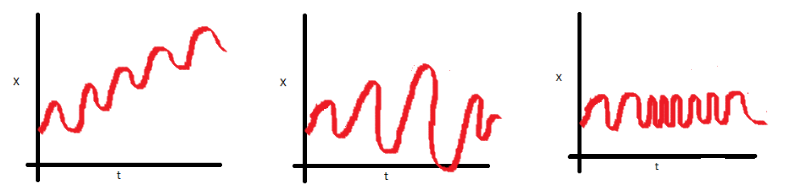

Пример стационарного временного ряда:

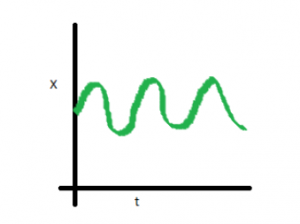

Какой из вышеперечисленных графиков было бы проще спрогнозировать? Четвертый! 

Большинство статистических моделей требуют, чтобы ряды были стационарными. В следующем разделе мы рассмотрим различные методы проверки, является ли данный ряд стационарным или нет. И как сдклать его стационарным.

### 1.2 Загрузка данных

Давайте скачаем и проанализируем набор данных [AirPassengers](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/AirPassengers.csv), который мы будем использовать. Этот пример уже можно считать классическим.

In [2]:
!wget https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/AirPassengers.csv
#!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2021-03-29 22:16:42--  https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/AirPassengers.csv
Resolving s3-ap-south-1.amazonaws.com... 52.219.156.5
Connecting to s3-ap-south-1.amazonaws.com|52.219.156.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/csv]
Saving to: 'AirPassengers.csv'

AirPassengers.csv   100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-03-29 22:16:43 (24.5 MB/s) - 'AirPassengers.csv' saved [1746/1746]



In [3]:
#reading the dataset
df = pd.read_csv('AirPassengers.csv')

#preprocessing
df.index = pd.to_datetime(df['Month'])
df.drop('Month',axis = 1, inplace = True)

#looking at the first few rows
print(df.shape)
df.head()

(144, 1)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 1.3 Методы проверки стационарности

Следующий шаг - определить, является ли данный ряд стационарным или нет.

Вот некоторые общие методы, которые мы можем использовать для выполнения этой проверки.

#### Визуальный тест

Рассмотрим график так, как мы это делали в примере выше: мы можем определить ряд, в котором среднее значение, дисперсия и ковариация менялись со временем. Точно так же мы можем построить данные и определить, меняются ли свойства ряда со временем или нет.

<AxesSubplot:xlabel='Month'>

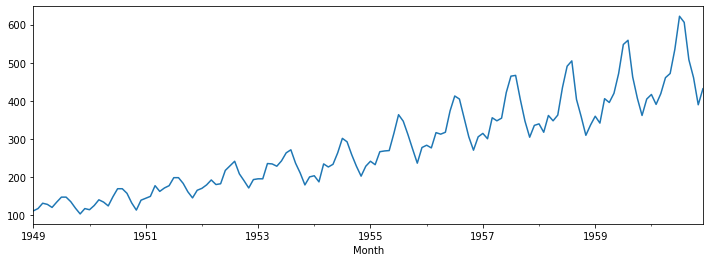

In [4]:
plt.figure(figsize=(12, 4))
df['#Passengers'].plot()

Хотя в нашем случае, совершенно очевидно, что у нас есть тренд (переменное среднее), этот визуальный подход не всегда может давать точные результаты.

Лучше подтвердить наблюдения с помощью статистических тестов. Вот математическое объяснение того же:

Предположим, у нас есть временной ряд: y(t) = a*y(t-1) + ε( t), где y(t) - значение в момент времени t, а ε(t) - погрешность.

Для вычисления y(t) нам нужно значение y(t-1), которое составляет: y(t-1) = a*y(t-2) + ε (t-1)

Если мы сделаем это для всех наблюдений, значение yt будет следующим: y(t) = a^n*y(t-n) + Σε(t-i)*a^i

Если значение a равно 1 (единица) в приведенном выше уравнении, тогда прогнозы будут равны y(t-n) и сумме всех ошибок от t-n до t, что означает, что дисперсия будет увеличиваться со временем.

Это известно как единичный корень во временном ряду. 
Мы знаем, что для стационарных временных рядов дисперсия не должна быть функцией времени.
Тесты на единичный корень проверяют наличие единичного корня в серии, проверяя, выполняется ли условие: a = 1.

Ниже приведены два наиболее часто используемых стационарных теста единичного корня:

#### ADF (Augmented Dickey Fuller) Test
Тест Дики Фуллера - один из самых популярных статистических тестов.

Его можно использовать для определения наличия единичного корня в ряду и, следовательно, помочь нам понять, является ли ряд стационарным или нет.

Нулевая и альтернативная гипотезы этого теста:
- Нулевая гипотеза: ряд имеет единичный корень (значение a = 1)
- Альтернативная гипотеза: у ряда нет единичного корня.

Если нам не удастся отвергнуть нулевую гипотезу, мы можем сказать, что ряд нестационарен.
Это означает, что ряд может быть линейным или разностным стационарным (мы узнаем больше о разностном стационарном в следующем разделе).

In [5]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(df['#Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


Тест на стационарность: Когда Test Statistic превышает Critical Value, мы не можем отклонить нулевую гипотезу (что означает, что ряд не является стационарным).

В нашем примере выше Test Statistic > Critical Valueя, что означает, что ряд не является стационарным.
Это подтверждает наше первоначальное наблюдение, которое мы первоначально видели в визуальном тесте.

#### 2. KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test

KPSS - еще один тест для проверки стационарности временного ряда (немного менее популярный, чем тест Дики Фуллера).

Нулевая и альтернативная гипотезы для теста KPSS противоположны гипотезе теста ADF, что часто вызывает путаницу.

Авторы теста KPSS определили нулевую гипотезу, поскольку процесс является стационарным по тренду, к альтернативной гипотезе ряда единичного корня.

Давайте посмотрим на результаты теста KPSS:
- Нулевая гипотеза: процесс является стационарным.
- Альтернативная гипотеза: ряд имеет единичный корень (ряд не является стационарным).

In [6]:
import warnings
warnings.filterwarnings("ignore")

#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print(kpss_output)

kpss_test(df['#Passengers'])

Results of KPSS Test:
Test Statistic            1.052175
p-value                   0.010000
Lags Used                14.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


Тест на стационарность: если статистика теста больше критического значения, мы отклоняем нулевую гипотезу (ряд не является стационарным), если не удалось отклонить нулевую гипотезу (ряд стационарный).

Для данных авиапассажиров значение тестовой статистики превышает критическое значение на всех доверительных интервалах, и, следовательно, мы можем сказать, что ряд не является стационарным.

Может случиться так, что оба теста покажут противоречивые результаты.
Это потому, что существует более одного типа стационарности:
- тест ADF имеет альтернативную гипотезу о линейной или диффиренцируемой стационарности
- а тест KPSS определяет стационарность тренда в серии.

### 1.4 Типы стационарности:

Давайте разберемся с различными типами стационарностей и как интерпретировать результаты вышеуказанных тестов.

- **Strict Stationary**: строгий стационарный ряд удовлетворяет математическому определению стационарного процесса.
Для строгого стационарного ряда среднее значение, дисперсия и ковариация не являются функцией времени.
Цель состоит в том, чтобы преобразовать нестационарный ряд в строгий стационарный ряд для прогнозирования.

- **Trend Stationary**: ряд, не имеющий единичного корня, но демонстрирующий тренд, называется стационарным рядом тренда.
После удаления тренда результирующий ряд будет строго стационарным.
Тест KPSS классифицирует ряд как стационарный из-за отсутствия единичного корня.

Это означает, что ряды могут быть строго стационарными или стационарными по тренду.

- **Difference Stationary**: временной ряд, который можно сделать строго стационарным путем дифференцирования, попадает в категорию стационарных разностей. Тест ADF также известен как difference stationarity test.

**Всегда лучше применять оба теста, чтобы мы были уверены, что ряд действительно стационарный.**

Давайте посмотрим на возможные результаты применения этих стационарных тестов.

- Случай 1: **Оба теста показывают, что серия не является стационарной** -> серия не стационарна.

- Случай 2: **Оба теста показывают, что серия стационарна** -> серия стационарна.

- Случай 3: **KPSS = стационарный и ADF = не стационарный** -> тренд стационарный, удалите тренд, чтобы сделать ряд строго стационарным

- Случай 4: **KPSS = не стационарный и ADF = стационарный** -> разностный стационарный, используйте разность, чтобы сделать серию стационарной

### 1.5 Создание стационарного временного ряда

#### Дифференцирование
В этом методе мы вычисляем разность последовательных членов в серии.

Дифференцирование обычно выполняется, чтобы избавиться от переменного среднего.

Математически разность можно записать как:
y(t)‘= y(t) — y(t-1),
где y(t) - значение в момент времени t

<AxesSubplot:xlabel='Month'>

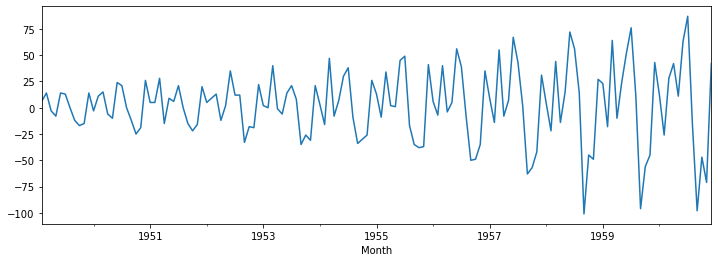

In [7]:
df['#Passengers_diff'] = df['#Passengers'] - df['#Passengers'].shift(1)
plt.figure(figsize=(12, 4))
df['#Passengers_diff'].dropna().plot()

#### Выделение сезонности (Seasonal Differencing)
При выделении сезонности вместо вычисления разницы между последовательными значениями мы вычисляем разницу между наблюдением и предыдущим наблюдением того же сезона.

Например, наблюдение, сделанное в понедельник, будет вычтено из наблюдения, сделанного в предыдущий понедельник.

Математически это можно записать так: y(t)‘= log(y(t)) — log(y(t-1)), где y(t) - значение в момент времени t

<AxesSubplot:xlabel='Month'>

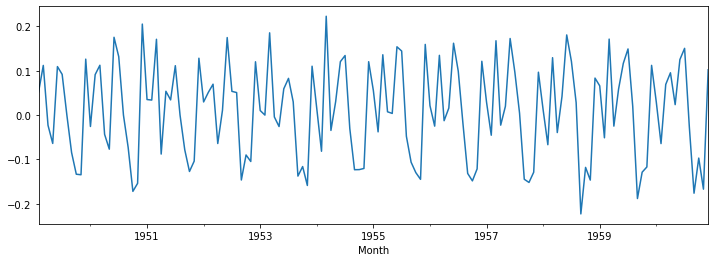

In [8]:
df['#Passengers_log'] = np.log(df['#Passengers'])
df['#Passengers_log_diff'] = df['#Passengers_log'] - df['#Passengers_log'].shift(1)
#df['#Passengers_log'] = np.sqrt(df['#Passengers'].dropna())

plt.figure(figsize=(12, 4))
df['#Passengers_log_diff'].dropna().plot()

Как видите, этот график является значительным улучшением по сравнению с предыдущими графиками.

### Декомпозиция
---
- Base Level (базовый сигнал)
- Trend (тренд)
- Seasonality (сезонность)
- Error (ошибка)

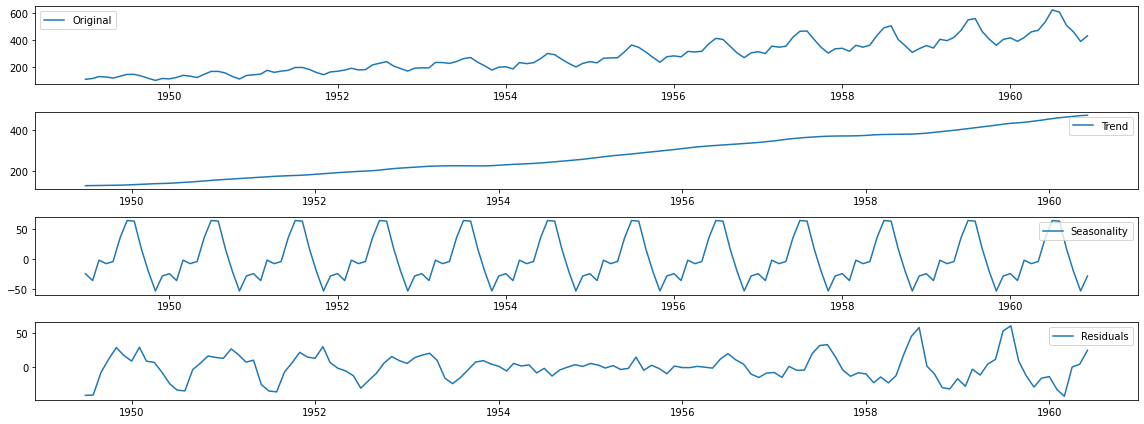

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['#Passengers'])

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 6))
plt.subplot(411)
plt.plot(df['#Passengers'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Однако не обязательно, чтобы все временные ряды имели тренд и/или сезонность.

В зависимости от характера тренда и сезонности временной ряд может быть смоделирован как аддитивный или мультипликативный. При этом каждое наблюдение в ряду может быть выражено либо как сумма, либо как произведение компонентов.

### Resampling
Для анализа цикличных зависимостей, используется функция df.resample (), которая позволяет нам перегруппировать наши временные ряды до желаемых частот.

Например, по кварталам, или по годам.

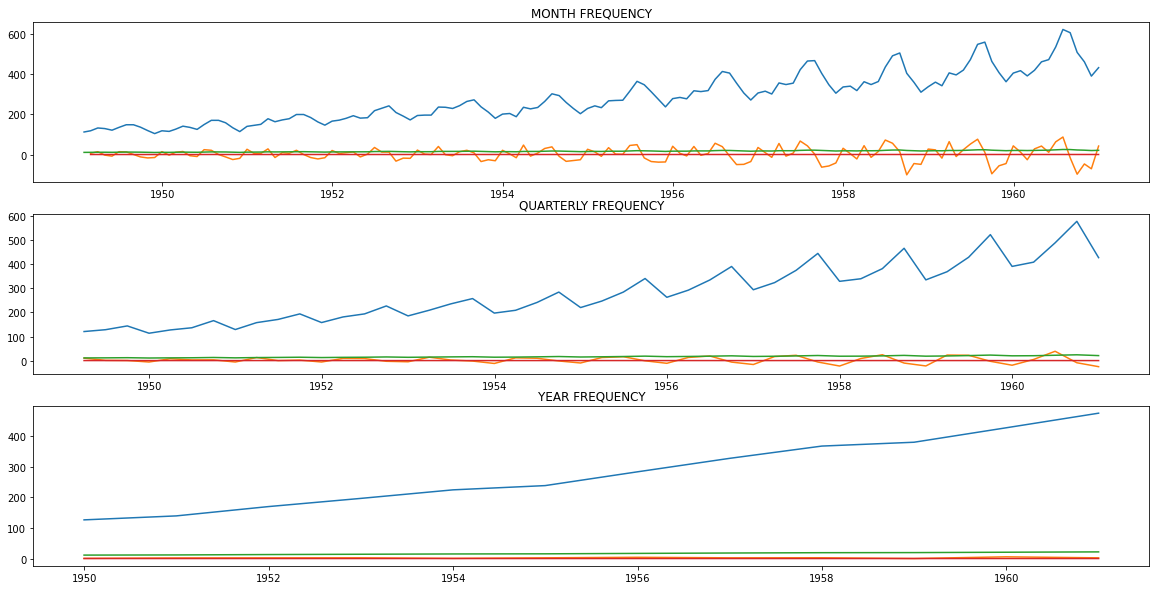

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(3,figsize=(20,10))

ax1.plot(df.resample('M').mean())
ax1.set_title('MONTH FREQUENCY');

ax2.plot(df.resample('Q').mean())
ax2.set_title('QUARTERLY FREQUENCY');

ax3.plot(df.resample('A').mean())
ax3.set_title('YEAR FREQUENCY');

### Сделаем предикт с помощью ARIMA
ARIMA - это авторегрессионная интегрированная модель скользящего среднего, которая определяется тремя параметрами порядка: (p, d, q).

И тут мы схитрим :)

Используем функцию auto_arima из библиотеки pmdarima для того, чтобы определить наиболее оптимальные параметры для модели ARIMA и плучить наилучшим образом подобранную модель ARIMA. Не факт, что мы смогли бы достигнуть такого результата без auto_arima.

In [11]:
# To install the library
#!pip install pmdarima
clear_output()
  
# Import the library
from pmdarima import auto_arima
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(df['#Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1022.896, Time=0.22 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.98 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=0.32 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=0.30 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.34 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=0.92 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=0.57 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.08 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=4.30 sec
 ARIMA(0,1,1)(1,1,1)[12]     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Mon, 29 Mar 2021   AIC                           1019.178
Time:                                     20:42:41   BIC                           1030.679
Sample:                                          0   HQIC                          1023.851
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

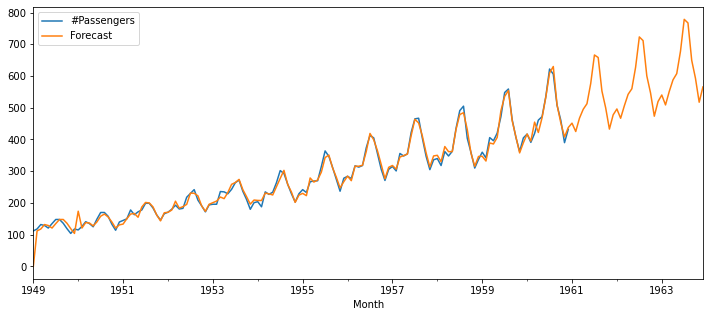

In [12]:
#Forecast using ARIMA Model
# Fit a SARIMAX(0, 1, 1)x(2, 1, 1, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the model on the full dataset
model = SARIMAX(df['#Passengers'], 
                        order = (0, 1, 1), 
                        seasonal_order =(2, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 3 years
forecast = result.predict(start = 0, 
                          end = (len(df['#Passengers'])-1) + 3 * 12, 
                          typ = 'levels').rename('Forecast')
  
# Plot the forecast values
df['#Passengers'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

### Вывод:
Таким образом, мы:
1. Ппознакомились с вариантами выполнения анализа временного ряда перед применение методов Mashing Learning
2. Увидели, что для применения обычных методов ML требуется провести достаточно большую предварительную обработку данных, которые, нейронная сети делает "автоматически"
3. Благодаря серьезному развитию методов ML мы смогли с высокой точностью спрогнозировать данный пример. НО! Сможем ли повторить результат на действительно сложном временном ряде? Например, курсе акций?

## 2. А теперь сделаем предикт с помощью Deep Learning (PyTorch LSTM)
----
[Time Series Prediction with LSTM Using PyTorchTime Series Prediction with LSTM Using PyTorch](https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=NabsV8O5BBd5https://colab.research.google.com/github/dlmacedo/starter-academic/blob/master/content/courses/deeplearning/notebooks/pytorch/Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb#scrollTo=NabsV8O5BBd5)

- Dataloading
- Скалирование
- Формирование ансамблей данных 
- LSTM Mode
- Traning
- Testing

In [13]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

### Dataloading

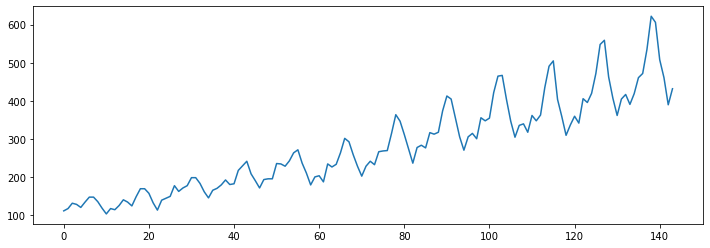

In [14]:
#!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

training_set = pd.read_csv('airline-passengers.csv')
training_set = training_set.iloc[:,1:2].values # перевели dataframe в numpy.array

# plotting
plt.figure(figsize=(12, 4))
plt.plot(training_set, label = 'Airline Passangers Data')

plt.show()

### Скалирование данных

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler # проверить все

xScaler = MinMaxScaler()
training_data = xScaler.fit_transform(training_set)

### Формирование ансамблей данных

In [16]:
# функция создания "ансамблей" данных
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

In [17]:
# установка длины ансамбля. от нее практически всегда зависит точность предикта и быстродействие
seq_length = 8 # сравните 2 и 32
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.8)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

trainX.shape, trainY.shape, testX.shape, testY.shape

(torch.Size([108, 8, 1]),
 torch.Size([108, 1]),
 torch.Size([27, 8, 1]),
 torch.Size([27, 1]))

### LSTM Model
Ее преимущество при применении в нестационарных временных рядах заключается в способности выявления взаимосвязей данных внутри временных рядов и "автоматическое" выделение различных типов сезонности, тенденций изменений дисперсий, ковариации и проч характеристик временного ряда..

In [18]:
class LSTM(nn.Module):
    """
    num_classes :
    input_size  :
    hidden_size :
    num_layers  :
    
    """
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers  = num_layers
        self.input_size  = input_size
        self.hidden_size = hidden_size
        self.seq_length  = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True,
                            dropout = 0.4)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        h_out = h_out.view(-1, self.hidden_size)
        out = self.fc(h_out)
        
        return out

### Traning

In [19]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
# Сложность нейронки должна быть адекватна датасету !!!
hidden_size = seq_length # а можно попробовать 400 - в чем разница?
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.15478
Epoch: 100, loss: 0.00500
Epoch: 200, loss: 0.00372
Epoch: 300, loss: 0.00283
Epoch: 400, loss: 0.00241
Epoch: 500, loss: 0.00229
Epoch: 600, loss: 0.00220
Epoch: 700, loss: 0.00211
Epoch: 800, loss: 0.00201
Epoch: 900, loss: 0.00147
Epoch: 1000, loss: 0.00123
Epoch: 1100, loss: 0.00103
Epoch: 1200, loss: 0.00088
Epoch: 1300, loss: 0.00080
Epoch: 1400, loss: 0.00074
Epoch: 1500, loss: 0.00066
Epoch: 1600, loss: 0.00057
Epoch: 1700, loss: 0.00051
Epoch: 1800, loss: 0.00047
Epoch: 1900, loss: 0.00045


### Testing

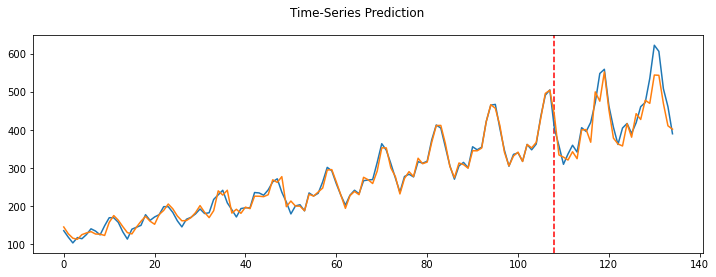

In [20]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = xScaler.inverse_transform(data_predict)
dataY_plot = xScaler.inverse_transform(dataY_plot)

# Ploitting
plt.figure(figsize=(12, 4))
plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()

### Выводы:
---
1. Использование LSTM слоев при прогнозировании нестационарных временных рядов - отличное решение, тк нейронка способна самостоятельно выденить динамики изменениях составляющих временного ряда. Правда, в более сложных случаях (трейдинге, например, или чтении и расшивровки волн мозга) приходится прибегать к feature ingineering
2. Сложость нейронной сети должна быть адекватна сложности подаваемых в нее данных. С ростом ансамбля и числа нейронов увеличивается заучивание тренировочной выборки и теряется способность к обощению
3. Предварительный анализ цикличности в данных (если она есть) помогает понять оптимальный размер ансамбля (тут видно, что цикл в среднем составляет 8 интервалов)
4. Также результат может зависеть от типа скалирования, который Вы применяете. Нужно знать принципы работы скаллеров и не стесняться экспериментировать с ними. См. статьи: [Data Preprocessing with Scikit-Learn: Standardization and Scaling](https://towardsdatascience.com/data-preprocessing-with-scikit-learn-standardization-and-scaling-cfb695280412) и [Gradient Descent, the Learning Rate, and the importance of Feature Scaling](https://towardsdatascience.com/gradient-descent-the-learning-rate-and-the-importance-of-feature-scaling-6c0b416596e1)
5. При всей выгодности приненении нейронных сетей, необходимо быть осторожным с автокорреляцией (см статью [Avoiding the pitfalls](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424))